# Programming assingment in Multivariable Analysis
## by Teodor Zacke, Caisa Kjellström, Nikolaj Skoog Pirinen

# Task 1

In [46]:
from scipy import *
from matplotlib.pyplot import *
from numpy import *
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fmin

%matplotlib notebook

Optimization terminated successfully.
         Current function value: -4.000000
         Iterations: 75
         Function evaluations: 142


<IPython.core.display.Javascript object>


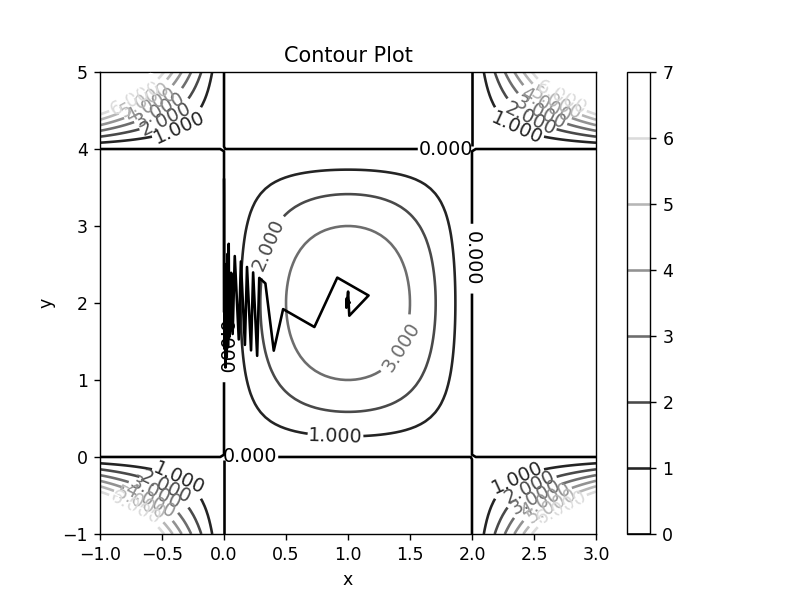

[2.55324580e+43 7.53321248e+43]


In [47]:

def func(x,y):
    return 8*x*y-4*(x**2)*y-2*x*(y**2)+(x**2)*(y**2)

def save_it(k):
    """
    callback function to retireve all values in opt.fmin
    
    k = vector
    """
    global xit
    global zit
    xit.append(k[0])
    zit.append(k[1])

xit = []  #a list with all the iteration values of fmin
zit = []

func2 = lambda x : -func(x[0], x[1])
#makes function negative because it will find a max otherwise (or give error that 
#maximum number of function evaluations has been exeeded)

guess = np.array([0,4])
xval = linspace(0,22)
fmin(func2, guess, full_output=True, callback=save_it, retall=True)

X, Y = meshgrid(linspace(-1., 3., 100),
                linspace(-1., 5., 100))      #Range of plot window
lvl = [i for i in range(0, 8)]
Z = func(X, Y)
guess = np.array([2,4])

con = contour(X, Y, Z, lvl, cmap='gray')
clabel(con, inline=True, fontsize=11)
plot(xit, zit, color='black')
colorbar(con)
title('Contour Plot')
xlabel('x')
ylabel('y')
show()

print(fmin(func2, guess))
#theoretically, we got the point (x,y,z)=(1,2,4), which is what we got through this code.

# Task 2

In [48]:
from scipy import integrate
from matplotlib.pyplot import *
from numpy import *

def func(x):
    return sqrt(4*x**2+9*x**4)

q = integrate.quad(func, -2, 1)
print(q)

#Our theoretical result was blabla


(10.513125162759344, 3.3785477526748764e-08)


# Task 3

In [49]:
import scipy as sc
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.optimize import fsolve

<IPython.core.display.Javascript object>


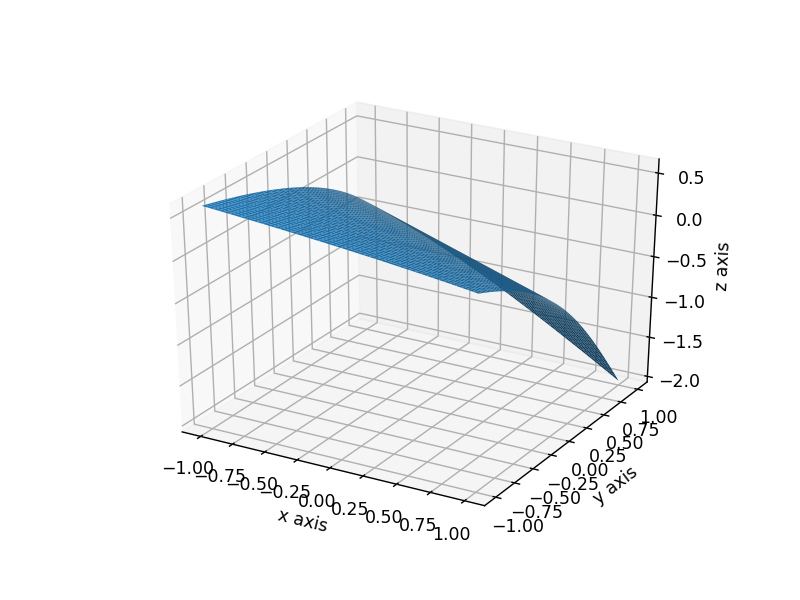

Text(0.5, 0, 'z axis')

In [50]:
#POINT 1

def f(x,y,z):
    return x+2*y+z+math.exp(2*z)-1

def f_z(x,y):
    """
    Function that estimates a value for z such that f(x,y,z)=0. This is done by suggesting 
    different x,y values. So basically, our z(x,y).
    Trying different values of the second argument in the fsolve function yields a sort of push in a direction on the x-axis
    which the function is shown (an interpretation by experimenting and observation).
    """
    def f2(z):
        return f(x,y,z)
    return fsolve(f2, 4)

x = np.linspace(-1,1,50)
y = np.linspace(-1,1,50)
X,Y = np.meshgrid(x,y)
z=[]
for (x,y) in zip(X,Y):
    z.append([f_z(i,j) for (i,j) in zip(x,y)])
Z = np.squeeze(np.asarray(z))                       #squeezing to get rid of the third dimension, plot_surface only takes 2D-arrays as args.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')



In [53]:
#POINT 2

def num_der2(f, x, y, k=1e-4):
    """
    Differentiate to second degree.
    
    INPUT
    f = callable function
    x, y = coordinate you want to evaluate at
    h = a very small number
    
    RETURN
    first der wrt x, first der wrt y, second der wrt xx, second der mixed, second der wrt yy
    (in that order)
    
    OBS! these are the numbers that are later inserted in the Taylor approx formula, i.e values of the derivatives
    near given point
    """
    def num_der1(f, x, y, h=1e-8):
        """
        differentiate function with the definition of the derivative.
        """
        return ((f(x+h,y)-f(x,y))/h),((f(x,y+h)-f(x,y))/h)
    h = 1e-8
    k = 1e-4

    xx = float((f(x+h+k,y)-f(x+k,y)-f(x+h,y)+f(x,y))/(h*k))
    yy = float((f(x,y+h+k)-f(x,y+k)-f(x,y+h)+f(x,y))/(h*k))
    xy = float((f(x+h,y+k)-f(x,y+k)-f(x+h,y)-f(x,y))/(h*k))
    x1 = float(num_der1(f, x, y, h)[0])
    y1 = float(num_der1(f, x, y, h)[1])
    
    return x1, y1, xx, xy, yy


#In fractions, the numbers produced by num_der2(f_z, 0, 0) are approximately -1/3, -2/3, -4/27, -8/27, -16/27. 
#When inserted into the Taylor formula (described in point 3) the xx and yy coefficients will be divided 
#by two, making the coefficients:

f11 = ((num_der2(f_z, 0, 0)[2])/2)
f22 = ((num_der2(f_z, 0, 0)[4])/2)

print(num_der2(f_z, 0, 0)[0], num_der2(f_z, 0, 0)[1], f11, num_der2(f_z, 0, 0)[3], f22)


-0.3333333387119166 -0.6666666691848445 -0.07404533560006958 -0.2963907267414568 -0.29633490344275487


<IPython.core.display.Javascript object>


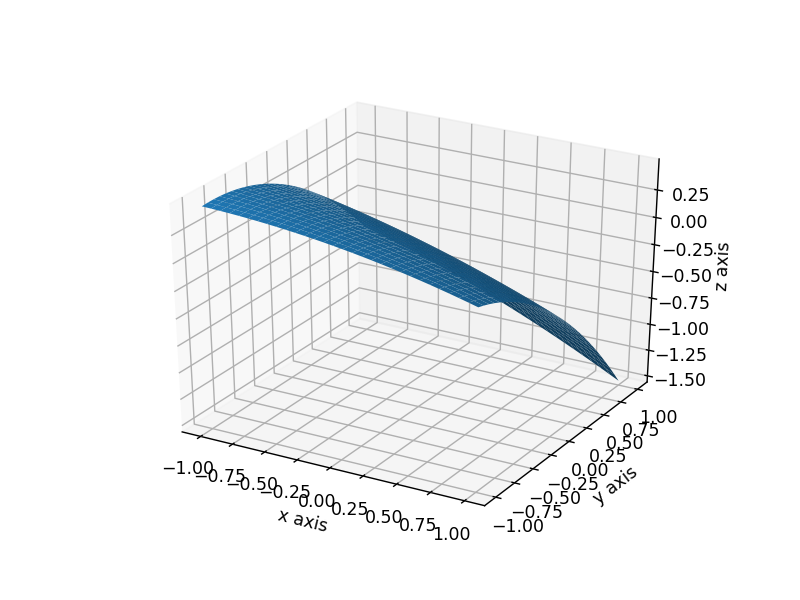

Text(0.5, 0, 'z axis')

In [52]:
#POINT 3

def p2(f, x, y):
    """
    The Taylor polynomial around x=y=0 (Macalurin formula)
    with coefficients from num_der.
    
    f(x,y)~f(0,0)+<(x,y),nabla>f(0,0)+(<(x,y),nabla>)^2f(0,0)
            = 
    """
    f1, f2, f11, f12, f22 = num_der2(f_z, 0, 0)
    return float(f1*x+f2*y+(1/2)*(f11*x**2+f12*x*y+f22*y**2))


x = np.linspace(-1,1,30)
y = np.linspace(-1,1,30)
X,Y = np.meshgrid(x,y)
z=[]
for (x,y) in zip(X,Y):
    z.append([p2(f_z,i,j) for (i,j) in zip(x,y)])
Z = np.squeeze(np.asarray(z))                   
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

In [44]:
#POINT 4

p2list = []
flist = []
#def error(f, x, y):
#    """
#    Function of the error, defined in the assignment as 
#    |z(x,y)-p2(x,y)|/|z(x,y)|
#    """
#    return abs(f(x,y)-p2(f,x,y))/abs(f(x,y))

x = np.linspace(-1,1,30)
y = np.linspace(-1,1,30)
X,Y = np.meshgrid(x,y)
z=[]

for (x,y) in zip(X,Y):
    p2list.append([p2(f_z,i,j) for (i,j) in zip(x,y)])

for (x,y) in zip(X,Y):
    flist.append([f_z(i,j) for (i,j) in zip(x,y)]) 

for i in len(p2list):
    (abs(flist[i]-p2list[i])/(abs(flist[i])))
    
Z = np.squeeze(np.asarray(z))                    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

KeyboardInterrupt: 